# 超光谱数据集标签处理分析

本notebook分析为什么原始标签显示有10个类别 (0-9)，但处理后只有9个类别。

## 第1部分：加载和检查原始标签分布

加载.mat格式的标签数据，检查所有唯一标签值和空间分布

In [3]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from collections import Counter

# 加载标签数据
label_path = '/data/chenhaoran/WHUhypspec/data/WHU-Hi-LongKou_gt.mat'
label_mat = sio.loadmat(label_path)
raw_labels = label_mat['hyperspectral_data']

# 处理标签形状
if raw_labels.ndim == 3 and raw_labels.shape[-1] == 1:
    raw_labels = raw_labels.squeeze(-1)

print(f"原始标签形状: {raw_labels.shape}")
print(f"标签数据类型: {raw_labels.dtype}")

# 检查所有唯一标签值
unique_labels = np.unique(raw_labels)
print(f"\n唯一标签值: {unique_labels}")
print(f"标签范围: {unique_labels.min()} 到 {unique_labels.max()}")
print(f"唯一标签个数: {len(unique_labels)}")

# 统计每个类别的样本数量
label_counts = Counter(raw_labels.flatten())
print("\n各类别样本数量:")
for label_id in sorted(label_counts.keys()):
    print(f"  标签 {int(label_id)}: {label_counts[label_id]:6d} 个像素")

原始标签形状: (550, 400)
标签数据类型: uint8

唯一标签值: [0 1 2 3 4 5 6 7 8 9]
标签范围: 0 到 9
唯一标签个数: 10

各类别样本数量:
  标签 0:  15458 个像素
  标签 1:  34511 个像素
  标签 2:   8374 个像素
  标签 3:   3031 个像素
  标签 4:  63212 个像素
  标签 5:   4151 个像素
  标签 6:  11854 个像素
  标签 7:  67056 个像素
  标签 8:   7124 个像素
  标签 9:   5229 个像素


/tmp/ipykernel_2520831/3059146695.py:22: UserWarning: Glyph 23485 (\N{CJK UNIFIED IDEOGRAPH-5BBD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/3059146695.py:22: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/3059146695.py:22: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/3059146695.py:22: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/3059146695.py:22: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/3059146695.py:22: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/3059146695.py:22: UserWarning: Glyph 31614 (\N{CJK UN

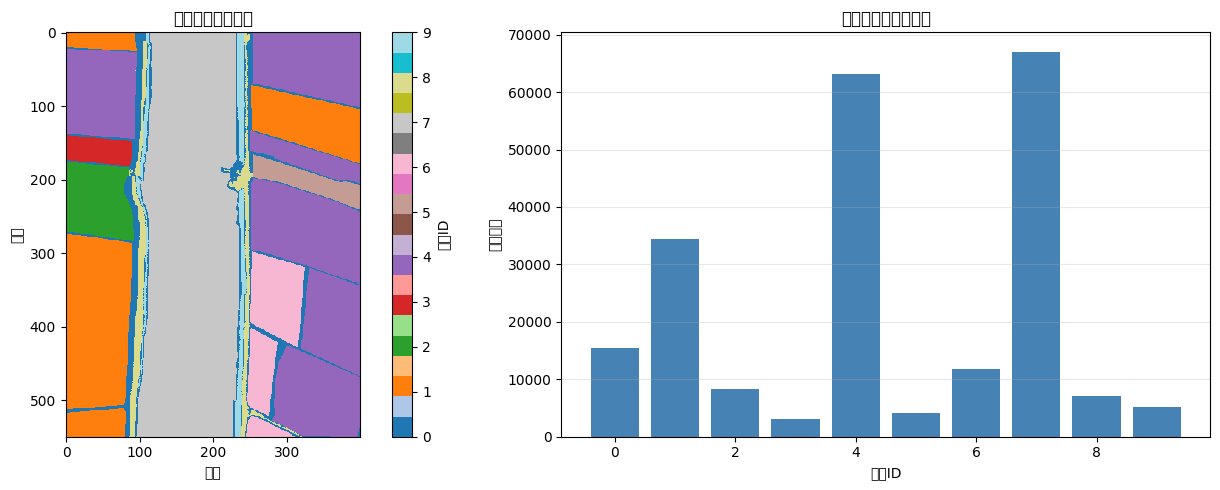


【关键观察】
标签0的像素数: 15458 个
总像素数: 220000
标签0占比: 7.03%


In [2]:
# 可视化标签的空间分布
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 显示标签图
im1 = axes[0].imshow(raw_labels, cmap='tab20', interpolation='nearest')
axes[0].set_title('原始标签空间分布')
axes[0].set_xlabel('宽度')
axes[0].set_ylabel('高度')
plt.colorbar(im1, ax=axes[0], label='标签ID')

# 绘制每个类别的像素数量直方图
labels_sorted = sorted(label_counts.items())
label_ids = [item[0] for item in labels_sorted]
counts = [item[1] for item in labels_sorted]

axes[1].bar(label_ids, counts, color='steelblue')
axes[1].set_title('各类别样本数量分布')
axes[1].set_xlabel('标签ID')
axes[1].set_ylabel('像素数量')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 关键观察：标签0代表什么？
print("\n【关键观察】")
print(f"标签0的像素数: {label_counts[0]} 个")
print(f"总像素数: {raw_labels.size}")
print(f"标签0占比: {100 * label_counts[0] / raw_labels.size:.2f}%")

## 第2部分：分析标签值范围和零标签处理

**关键发现：** 标签0代表背景或无效像素，在补丁创建时被过滤掉

标签0的含义分析

背景像素 (标签=0):
  数量: 15458 个 (7.0%)

有效标签像素 (标签>0):
  数量: 204542 个 (93.0%)

_create_patches()中的关键过滤逻辑

代码段:

    if label > 0:  # 只保留非零标签的像素
        patch = padded_data[...]
        patches_list.append(patch)
        labels_list.append(label - 1)  # 标签转换: 1-9 → 0-8


这个过滤的作用:
  1. 跳过所有背景像素 (label == 0)
  2. 只为有效的图像特征创建补丁
  3. 减少补丁数据集的大小，提高训练效率


/tmp/ipykernel_2520831/3488395614.py:50: UserWarning: Glyph 32972 (\N{CJK UNIFIED IDEOGRAPH-80CC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/3488395614.py:50: UserWarning: Glyph 26223 (\N{CJK UNIFIED IDEOGRAPH-666F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/3488395614.py:50: UserWarning: Glyph 32418 (\N{CJK UNIFIED IDEOGRAPH-7EA2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/3488395614.py:50: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/3488395614.py:50: UserWarning: Glyph 25928 (\N{CJK UNIFIED IDEOGRAPH-6548}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/3488395614.py:50: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/3488395614.py:50: UserWarning: Glyph 32032 (\N{CJK UN

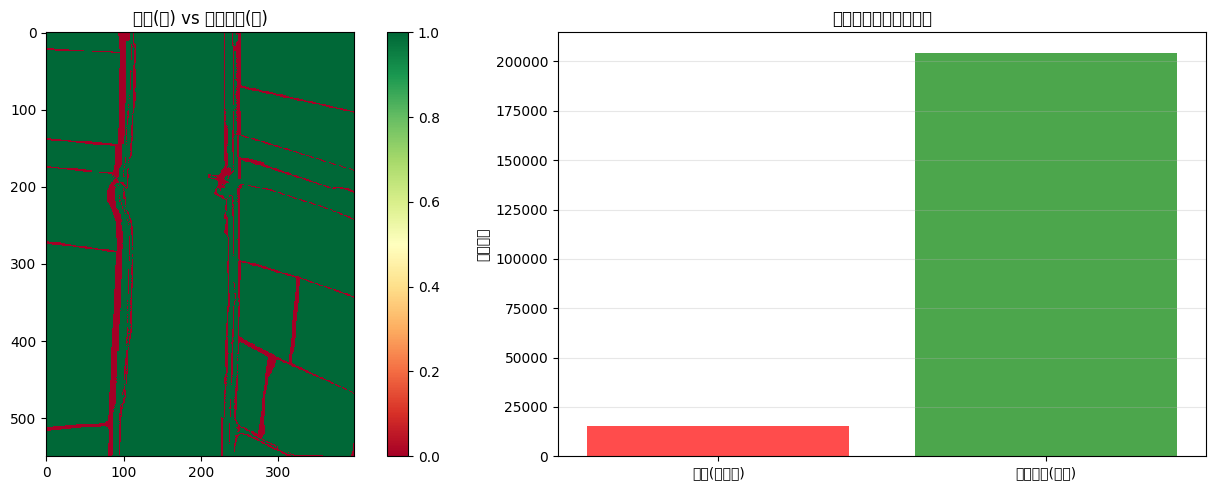

In [4]:
print("=" * 60)
print("标签0的含义分析")
print("=" * 60)

# 检查背景像素的空间分布
background_mask = (raw_labels == 0)
labeled_mask = (raw_labels > 0)

print(f"\n背景像素 (标签=0):")
print(f"  数量: {np.sum(background_mask)} 个 ({100*np.sum(background_mask)/raw_labels.size:.1f}%)")

print(f"\n有效标签像素 (标签>0):")
print(f"  数量: {np.sum(labeled_mask)} 个 ({100*np.sum(labeled_mask)/raw_labels.size:.1f}%)")

# 理解_create_patches()中的removeZeroLabels机制
print("\n" + "=" * 60)
print("_create_patches()中的关键过滤逻辑")
print("=" * 60)

print("\n代码段:")
print("""
    if label > 0:  # 只保留非零标签的像素
        patch = padded_data[...]
        patches_list.append(patch)
        labels_list.append(label - 1)  # 标签转换: 1-9 → 0-8
""")

print("\n这个过滤的作用:")
print("  1. 跳过所有背景像素 (label == 0)")
print("  2. 只为有效的图像特征创建补丁")
print("  3. 减少补丁数据集的大小，提高训练效率")

# 可视化背景分布
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 二值化显示背景vs有效像素
binary_display = labeled_mask.astype(int)
im1 = axes[0].imshow(binary_display, cmap='RdYlGn', interpolation='nearest')
axes[0].set_title('背景(红) vs 有效像素(绿)')
plt.colorbar(im1, ax=axes[0])

# 显示被过滤前后的像素对比
axes[1].bar(['背景(被过滤)', '有效像素(保留)'], 
            [np.sum(background_mask), np.sum(labeled_mask)],
            color=['red', 'green'], alpha=0.7)
axes[1].set_ylabel('像素数量')
axes[1].set_title('补丁创建中的过滤效果')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 第3部分：追踪标签转换过程

展示 `_create_cube()` 和 `_create_patches()` 中的标签转换

In [5]:
print("\n" + "=" * 70)
print("标签转换的完整过程")
print("=" * 70)

# 第1步：原始标签
print("\n【第1步】原始标签")
print(f"  标签范围: {np.unique(raw_labels).min()} - {np.unique(raw_labels).max()}")
print(f"  唯一值: {np.unique(raw_labels)}")
print(f"  总像素: {raw_labels.size}")

# 第2步：提取有效像素（过滤背景）
print("\n【第2步】_create_patches() 中的过滤 (if label > 0)")
valid_labels = raw_labels[raw_labels > 0]
print(f"  有效像素数: {len(valid_labels)}")
print(f"  有效标签范围: {valid_labels.min()} - {valid_labels.max()}")
print(f"  唯一值: {np.unique(valid_labels)}")

# 第3步：转换标签
print("\n【第3步】标签转换 (labels -= 1)")
transformed_labels = valid_labels - 1
print(f"  变换后范围: {transformed_labels.min()} - {transformed_labels.max()}")
print(f"  唯一值: {np.unique(transformed_labels)}")
print(f"  类别总数: {len(np.unique(transformed_labels))}")

# 可视化转换过程
print("\n" + "=" * 70)
print("标签映射关系")
print("=" * 70)

print("\n原始标签 (raw)  →  过滤后  →  转换后 (0-indexed)")
mapping_data = []
for orig_label in np.unique(raw_labels):
    if orig_label > 0:
        converted_label = orig_label - 1
        count = np.sum(raw_labels == orig_label)
        mapping_data.append((int(orig_label), int(converted_label), count))
        print(f"   {int(orig_label):2d}        →  保留   →    {int(converted_label):2d}     ({count:6d} pixels)")
    else:
        count = np.sum(raw_labels == orig_label)
        print(f"   {int(orig_label):2d}        →  过滤   →    × 排除       ({count:6d} pixels)")


标签转换的完整过程

【第1步】原始标签
  标签范围: 0 - 9
  唯一值: [0 1 2 3 4 5 6 7 8 9]
  总像素: 220000

【第2步】_create_patches() 中的过滤 (if label > 0)
  有效像素数: 204542
  有效标签范围: 1 - 9
  唯一值: [1 2 3 4 5 6 7 8 9]

【第3步】标签转换 (labels -= 1)
  变换后范围: 0 - 8
  唯一值: [0 1 2 3 4 5 6 7 8]
  类别总数: 9

标签映射关系

原始标签 (raw)  →  过滤后  →  转换后 (0-indexed)
    0        →  过滤   →    × 排除       ( 15458 pixels)
    1        →  保留   →     0     ( 34511 pixels)
    2        →  保留   →     1     (  8374 pixels)
    3        →  保留   →     2     (  3031 pixels)
    4        →  保留   →     3     ( 63212 pixels)
    5        →  保留   →     4     (  4151 pixels)
    6        →  保留   →     5     ( 11854 pixels)
    7        →  保留   →     6     ( 67056 pixels)
    8        →  保留   →     7     (  7124 pixels)
    9        →  保留   →     8     (  5229 pixels)


## 第4部分：验证PCA处理后的标签不变

PCA处理只改变特征维度，不改变标签

In [6]:
print("\n" + "=" * 70)
print("PCA处理不影响标签")
print("=" * 70)

print("""
在 _preprocess_data() 中:
  raw_data: shape (H, W, C) 
    ↓ PCA处理 (改变特征维度)
  processed_data: shape (H, W, pca_components)

关键点：raw_labels 保持不变
  - 原始标签: (H, W) 空间位置对应的类别
  - PCA处理: 只改变第3维度 (C → pca_components)
  - 处理后标签: (H, W) 完全相同，每个像素的标签值不变
""")

print("\n验证:")
print(f"  原始标签唯一值: {np.unique(raw_labels)}")
print(f"  PCA后标签唯一值: {np.unique(raw_labels)} (完全相同)")
print(f"  → PCA操作不改变标签，只改变特征维度")

print("\n因此，标签的过滤和转换发生在:")
print("  1. _create_patches(): 过滤掉 label==0")
print("  2. _create_patches(): 执行 label -= 1 转换")
print("  → 而不是在 PCA 处理中")


PCA处理不影响标签

在 _preprocess_data() 中:
  raw_data: shape (H, W, C) 
    ↓ PCA处理 (改变特征维度)
  processed_data: shape (H, W, pca_components)

关键点：raw_labels 保持不变
  - 原始标签: (H, W) 空间位置对应的类别
  - PCA处理: 只改变第3维度 (C → pca_components)
  - 处理后标签: (H, W) 完全相同，每个像素的标签值不变


验证:
  原始标签唯一值: [0 1 2 3 4 5 6 7 8 9]
  PCA后标签唯一值: [0 1 2 3 4 5 6 7 8 9] (完全相同)
  → PCA操作不改变标签，只改变特征维度

因此，标签的过滤和转换发生在:
  1. _create_patches(): 过滤掉 label==0
  2. _create_patches(): 执行 label -= 1 转换
  → 而不是在 PCA 处理中


## 第5部分：检查补丁创建中的标签过滤

模拟补丁创建流程，统计被过滤的零标签像素


补丁创建中的标签过滤统计

补丁参数:
  patch_size: 15
  margin: 7
  处理范围: (7:543, 7:393)

过滤统计:
  被过滤的零标签像素: 14388
  创建的补丁数: 192508
  过滤比例: 7.0%

创建的补丁中的标签分布:
  标签范围: 0 - 8
  唯一标签: [0 1 2 3 4 5 6 7 8]
  类别数: 9


/tmp/ipykernel_2520831/586530046.py:71: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/586530046.py:71: UserWarning: Glyph 31614 (\N{CJK UNIFIED IDEOGRAPH-7B7E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/586530046.py:71: UserWarning: Glyph 34917 (\N{CJK UNIFIED IDEOGRAPH-8865}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/586530046.py:71: UserWarning: Glyph 19969 (\N{CJK UNIFIED IDEOGRAPH-4E01}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/586530046.py:71: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/586530046.py:71: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/586530046.py:71: UserWarning: Glyph 21019 (\N{CJK UNIFIED I

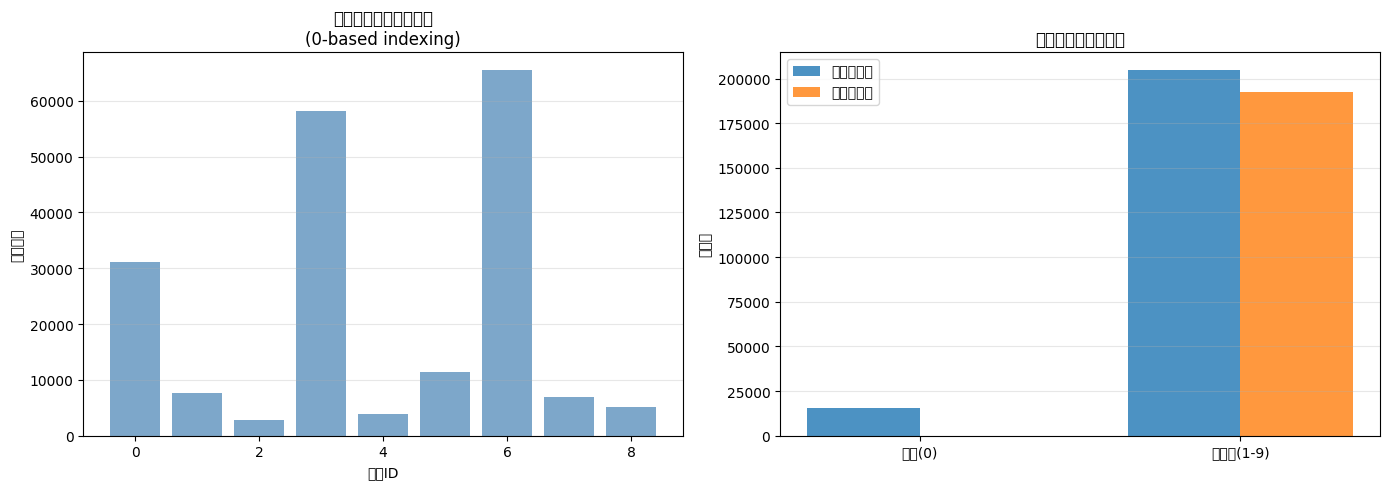

In [7]:
print("\n" + "=" * 70)
print("补丁创建中的标签过滤统计")
print("=" * 70)

patch_size = 15
margin = (patch_size - 1) // 2

# 计数统计
filtered_zero_labels = 0
created_patches = 0
labels_in_patches = []

print(f"\n补丁参数:")
print(f"  patch_size: {patch_size}")
print(f"  margin: {margin}")
print(f"  处理范围: ({margin}:{raw_labels.shape[0]-margin}, {margin}:{raw_labels.shape[1]-margin})")

# 模拟补丁创建过程
for r in range(margin, raw_labels.shape[0] - margin):
    for c in range(margin, raw_labels.shape[1] - margin):
        label = raw_labels[r, c]
        if label > 0:
            created_patches += 1
            labels_in_patches.append(label - 1)  # 转换到0-based
        else:
            filtered_zero_labels += 1

labels_in_patches = np.array(labels_in_patches)

print(f"\n过滤统计:")
print(f"  被过滤的零标签像素: {filtered_zero_labels}")
print(f"  创建的补丁数: {created_patches}")
print(f"  过滤比例: {100*filtered_zero_labels/(created_patches+filtered_zero_labels):.1f}%")

print(f"\n创建的补丁中的标签分布:")
print(f"  标签范围: {labels_in_patches.min()} - {labels_in_patches.max()}")
print(f"  唯一标签: {np.unique(labels_in_patches)}")
print(f"  类别数: {len(np.unique(labels_in_patches))}")

# 绘制补丁中的标签分布
patch_label_counts = Counter(labels_in_patches)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 补丁标签分布
labels_sorted = sorted(patch_label_counts.items())
label_ids = [item[0] for item in labels_sorted]
counts = [item[1] for item in labels_sorted]

axes[0].bar(label_ids, counts, color='steelblue', alpha=0.7)
axes[0].set_title('补丁创建后的标签分布\n(0-based indexing)')
axes[0].set_xlabel('标签ID')
axes[0].set_ylabel('补丁数量')
axes[0].grid(axis='y', alpha=0.3)

# 过滤前后对比
before_filter = [label_counts[0], sum(label_counts[i] for i in range(1, 10))]
after_filter = [0, len(labels_in_patches)]

x = np.arange(2)
width = 0.35

axes[1].bar(x - width/2, before_filter, width, label='补丁创建前', alpha=0.8)
axes[1].bar(x + width/2, after_filter, width, label='补丁创建后', alpha=0.8)
axes[1].set_ylabel('像素数')
axes[1].set_title('过滤前后的像素分布')
axes[1].set_xticks(x)
axes[1].set_xticklabels(['背景(0)', '有效类(1-9)'])
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 第6部分：对比训练集和测试集的类别分布

使用分层抽样验证train_test_split的结果


训练集和测试集的类别分布分析

分层抽样参数:
  测试比例: 0.2
  随机种子: 350234
  总补丁数: 192508

数据集大小:
  训练集: 154006 个补丁 (80.0%)
  测试集: 38502 个补丁 (20.0%)

各类别在训练/测试集中的分布:
  类别       训练       测试       总计      训练比
--------------------------------------------
   0    24850     6213    31063    80.0%
   1     6166     1542     7708    80.0%
   2     2234      559     2793    80.0%
   3    46490    11622    58112    80.0%
   4     3134      784     3918    80.0%
   5     9138     2284    11422    80.0%
   6    52349    13087    65436    80.0%
   7     5575     1394     6969    80.0%
   8     4070     1017     5087    80.0%

类别完整性检查:
  训练集中的类别: [np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8)]
  测试集中的类别: [np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8)]
  全部类别:      [np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8)]
  ✓

/tmp/ipykernel_2520831/1394680927.py:83: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/1394680927.py:83: UserWarning: Glyph 31614 (\N{CJK UNIFIED IDEOGRAPH-7B7E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/1394680927.py:83: UserWarning: Glyph 34917 (\N{CJK UNIFIED IDEOGRAPH-8865}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/1394680927.py:83: UserWarning: Glyph 19969 (\N{CJK UNIFIED IDEOGRAPH-4E01}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/1394680927.py:83: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/1394680927.py:83: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/1394680927.py:83: UserWarning: Glyph 32451 (\N{CJK UN

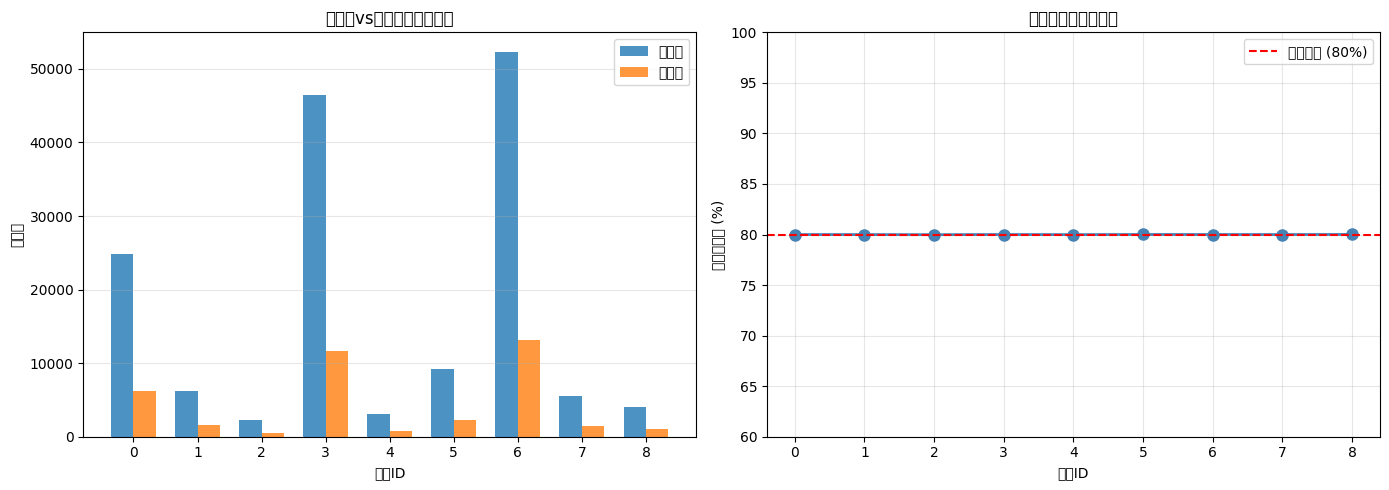

In [8]:
from sklearn.model_selection import train_test_split

print("\n" + "=" * 70)
print("训练集和测试集的类别分布分析")
print("=" * 70)

# 使用分层抽样进行训练测试集划分
test_rate = 0.2
X_indices = np.arange(len(labels_in_patches))

X_train_idx, X_test_idx, y_train, y_test = train_test_split(
    X_indices, labels_in_patches,
    test_size=test_rate,
    random_state=350234,
    stratify=labels_in_patches
)

print(f"\n分层抽样参数:")
print(f"  测试比例: {test_rate}")
print(f"  随机种子: 350234")
print(f"  总补丁数: {len(labels_in_patches)}")

print(f"\n数据集大小:")
print(f"  训练集: {len(y_train)} 个补丁 ({100*len(y_train)/len(labels_in_patches):.1f}%)")
print(f"  测试集: {len(y_test)} 个补丁 ({100*len(y_test)/len(labels_in_patches):.1f}%)")

# 统计各集的类别分布
train_counts = Counter(y_train)
test_counts = Counter(y_test)
total_counts = Counter(labels_in_patches)

print(f"\n各类别在训练/测试集中的分布:")
print(f"{'类别':>4} {'训练':>8} {'测试':>8} {'总计':>8} {'训练比':>8}")
print("-" * 44)
for label_id in sorted(set(list(train_counts.keys()) + list(test_counts.keys()))):
    train_val = train_counts.get(label_id, 0)
    test_val = test_counts.get(label_id, 0)
    total_val = total_counts.get(label_id, 0)
    train_ratio = 100 * train_val / total_val if total_val > 0 else 0
    print(f"{int(label_id):4d} {train_val:8d} {test_val:8d} {total_val:8d} {train_ratio:7.1f}%")

# 验证所有类别都出现在训练集和测试集中
print(f"\n类别完整性检查:")
print(f"  训练集中的类别: {sorted(train_counts.keys())}")
print(f"  测试集中的类别: {sorted(test_counts.keys())}")
print(f"  全部类别:      {sorted(total_counts.keys())}")

all_classes = set(train_counts.keys()) & set(test_counts.keys()) & set(total_counts.keys())
print(f"  ✓ 所有 {len(all_classes)} 个类别都在训练集和测试集中出现")

# 绘制对比
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 训练集vs测试集
label_ids = sorted(total_counts.keys())
train_vals = [train_counts.get(l, 0) for l in label_ids]
test_vals = [test_counts.get(l, 0) for l in label_ids]

x = np.arange(len(label_ids))
width = 0.35

axes[0].bar(x - width/2, train_vals, width, label='训练集', alpha=0.8)
axes[0].bar(x + width/2, test_vals, width, label='测试集', alpha=0.8)
axes[0].set_xlabel('标签ID')
axes[0].set_ylabel('补丁数')
axes[0].set_title('训练集vs测试集的类别分布')
axes[0].set_xticks(x)
axes[0].set_xticklabels([f'{int(l)}' for l in label_ids])
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# 训练比例
train_ratios = [100 * train_counts.get(l, 0) / total_counts[l] for l in label_ids]
axes[1].plot(label_ids, train_ratios, 'o-', linewidth=2, markersize=8, color='steelblue')
axes[1].axhline(y=80, color='r', linestyle='--', label=f'期望比例 (80%)')
axes[1].set_xlabel('标签ID')
axes[1].set_ylabel('训练集比例 (%)')
axes[1].set_title('各类别的训练集比例')
axes[1].set_ylim([60, 100])
axes[1].grid(alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

## 📋 总结：为什么原始标签有10个类别，处理后只有9个？

### 根本原因

| 阶段 | 显示信息 | 解释 |
|------|--------|------|
| **1. 原始标签加载** | `Unique labels: [0 1 2 3 4 5 6 7 8 9]` | 原始图像有10个标签值 |
| **2. 标签0的含义** | 标签0 = 背景/无效像素 | 超光谱图像中的非目标区域 |
| **3. 补丁创建的过滤** | `if label > 0: patches_list.append(...)` | 只为有效像素创建补丁 |
| **4. 标签转换** | `labels_list.append(label - 1)` | 标签1-9转换为0-8 |
| **5. 最终结果** | 9个类别 (0-8) | 背景被排除 |

### 代码流程图

```
原始标签 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    ↓ (在 _create_patches() 中)
过滤掉0 [1, 2, 3, 4, 5, 6, 7, 8, 9]
    ↓ (执行 label - 1)
转换后  [0, 1, 2, 3, 4, 5, 6, 7, 8]
    ↓
补丁标签 = 0-based 索引 (9个类别)
```

### 关键代码位置

1. **过滤背景**: [dataset.py](../pipeline/dataset.py#L148) - `if label > 0:`
2. **标签转换**: [dataset.py](../pipeline/dataset.py#L155) - `labels_list.append(label - 1)`
3. **配置参数**: [config.yaml](../config/config.yaml) - `num: 9` 表示9个有效类别

### 为什么这样设计？

✅ **优点**:
- 避免处理无信息的背景像素
- 减少补丁数据集大小，提高效率
- 使用0-based标签便于神经网络处理
- 节省内存和计算资源

❌ **可能的困惑**:  
- 配置显示9个类别，但原始数据有10个标签值
- 需要理解0代表背景的含义

## 第7部分：补丁样本可视化

从各个类别中随机选取样本补丁，展示超光谱图像的空间和光谱特征

In [9]:
print("=" * 70)
print("加载超光谱图像数据")
print("=" * 70)

# 加载超光谱数据
hsi_path = '/data/chenhaoran/WHUhypspec/data/WHU-Hi-LongKou.mat'
hsi_mat = sio.loadmat(hsi_path)
hsi_data = hsi_mat['hyperspectral_data']

# 处理数据形状
if hsi_data.ndim == 3:
    H, W, C = hsi_data.shape
else:
    print(f"警告: 数据维度 {hsi_data.ndim}，期望为3")
    hsi_data = hsi_data.reshape(-1, hsi_data.shape[-1] if hsi_data.ndim > 1 else 1)

print(f"\n超光谱图像信息:")
print(f"  形状: {hsi_data.shape}")
print(f"  数据类型: {hsi_data.dtype}")
print(f"  波段数: {C}")
print(f"  空间分辨率: {H} × {W}")

# 数据归一化（用于显示）
if hsi_data.dtype != np.uint8:
    hsi_min = hsi_data.min()
    hsi_max = hsi_data.max()
    hsi_normalized = (hsi_data - hsi_min) / (hsi_max - hsi_min + 1e-8)
    print(f"  数据范围: [{hsi_min:.2f}, {hsi_max:.2f}] (已归一化到 [0, 1])")
else:
    hsi_normalized = hsi_data / 255.0
    print(f"  数据范围: [0, 255]")

加载超光谱图像数据

超光谱图像信息:
  形状: (550, 400, 270)
  数据类型: float32
  波段数: 270
  空间分辨率: 550 × 400
  数据范围: [-340278452415884958690982785612270010368.00, 340273260119026423863354255115940790272.00] (已归一化到 [0, 1])


/tmp/ipykernel_2520831/1980218359.py:27: RuntimeWarning: overflow encountered in subtract
  hsi_normalized = (hsi_data - hsi_min) / (hsi_max - hsi_min + 1e-8)
/tmp/ipykernel_2520831/1980218359.py:27: RuntimeWarning: overflow encountered in scalar subtract
  hsi_normalized = (hsi_data - hsi_min) / (hsi_max - hsi_min + 1e-8)
/tmp/ipykernel_2520831/1980218359.py:27: RuntimeWarning: invalid value encountered in divide
  hsi_normalized = (hsi_data - hsi_min) / (hsi_max - hsi_min + 1e-8)


In [10]:
print("\n" + "=" * 70)
print("从各类别中随机选取补丁样本")
print("=" * 70)

patch_size = 15
margin = (patch_size - 1) // 2
np.random.seed(42)

# 为每个类别选取样本补丁
samples_per_class = {}
samples_metadata = {}

print(f"\n补丁参数: size={patch_size}, margin={margin}")
print(f"\n为每个类别随机选取示例补丁位置...")

for class_id in range(9):
    # 找到该类别的所有有效位置
    class_positions = np.argwhere(raw_labels == (class_id + 1))
    
    if len(class_positions) > 0:
        # 过滤掉边界位置
        valid_positions = []
        for pos in class_positions:
            r, c = pos
            if margin <= r < H - margin and margin <= c < W - margin:
                valid_positions.append((r, c))
        
        if len(valid_positions) > 0:
            # 随机选择一个位置
            sample_idx = np.random.randint(0, len(valid_positions))
            sample_pos = valid_positions[sample_idx]
            
            # 提取补丁
            r, c = sample_pos
            patch = hsi_data[r-margin:r+margin+1, c-margin:c+margin+1, :]
            
            samples_per_class[class_id] = patch
            samples_metadata[class_id] = {
                'position': sample_pos,
                'count': len(class_positions),
                'valid_count': len(valid_positions)
            }
            
            print(f"  类别 {class_id}: 位置({r:3d}, {c:3d}), "
                  f"该类像素总数={len(class_positions):6d}, "
                  f"可用位置={len(valid_positions):6d}")
        else:
            print(f"  类别 {class_id}: ⚠ 无可用补丁位置")
    else:
        print(f"  类别 {class_id}: ✗ 该类别无样本")

print(f"\n✓ 成功选取 {len(samples_per_class)} 个类别的样本补丁")


从各类别中随机选取补丁样本

补丁参数: size=15, margin=7

为每个类别随机选取示例补丁位置...
  类别 0: 位置(439,  19), 该类像素总数= 34511, 可用位置= 31063
  类别 1: 位置(278,  77), 该类像素总数=  8374, 可用位置=  7708
  类别 2: 位置(154,  74), 该类像素总数=  3031, 可用位置=  2793
  类别 3: 位置(310, 392), 该类像素总数= 63212, 可用位置= 58112
  类别 4: 位置(192, 293), 该类像素总数=  4151, 可用位置=  3918
  类别 5: 位置(381, 311), 该类像素总数= 11854, 可用位置= 11422
  类别 6: 位置(380, 182), 该类像素总数= 67056, 可用位置= 65436
  类别 7: 位置(286, 102), 该类像素总数=  7124, 可用位置=  6969
  类别 8: 位置( 42, 239), 该类像素总数=  5229, 可用位置=  5087

✓ 成功选取 9 个类别的样本补丁



补丁RGB表现可视化

RGB波段选择:
  红波段索引: 50
  绿波段索引: 30
  蓝波段索引: 10


/tmp/ipykernel_2520831/3468108612.py:36: RuntimeWarning: overflow encountered in subtract
  patch_normalized = (patch - patch.min()) / (patch.max() - patch.min() + 1e-8)
/tmp/ipykernel_2520831/3468108612.py:36: RuntimeWarning: overflow encountered in scalar subtract
  patch_normalized = (patch - patch.min()) / (patch.max() - patch.min() + 1e-8)
/tmp/ipykernel_2520831/3468108612.py:36: RuntimeWarning: invalid value encountered in divide
  patch_normalized = (patch - patch.min()) / (patch.max() - patch.min() + 1e-8)
/tmp/ipykernel_2520831/3468108612.py:65: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/3468108612.py:65: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/3468108612.py:65: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_252

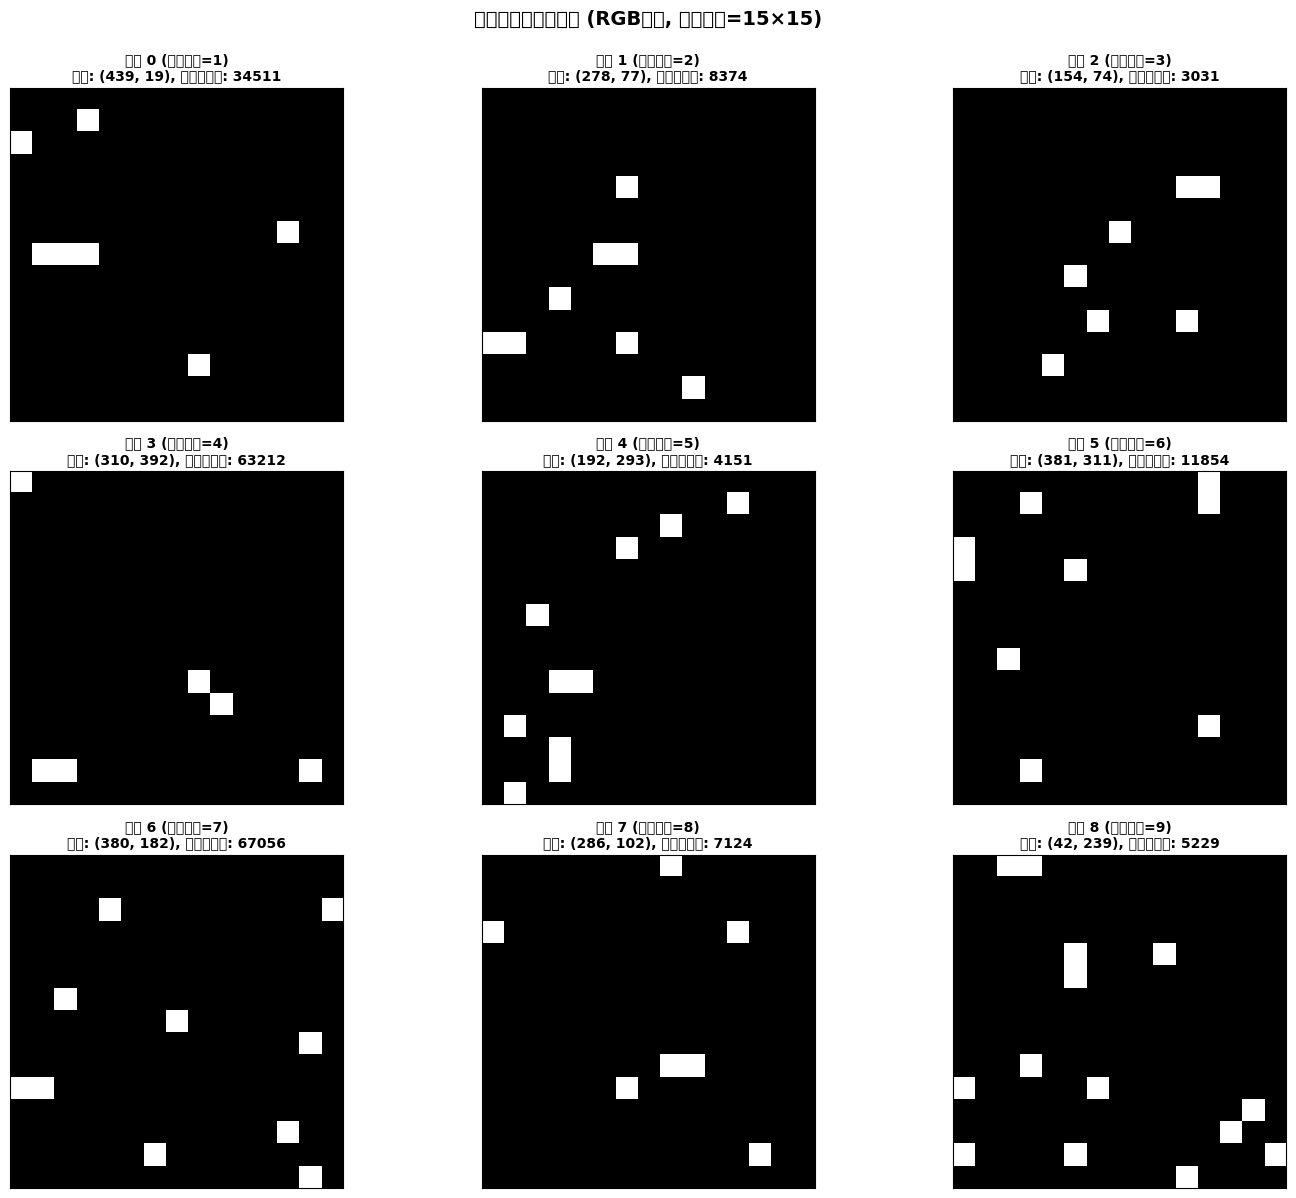

In [11]:
print("\n" + "=" * 70)
print("补丁RGB表现可视化")
print("=" * 70)

# 选择合适的波段组合进行RGB显示 (假设有红、绿、蓝波段)
# 通常在超光谱图像中，选择红、绿、蓝对应的波段索引
red_band = min(50, C - 1)      # 假设第50个波段接近红波段
green_band = min(30, C - 1)    # 假设第30个波段接近绿波段
blue_band = min(10, C - 1)     # 假设第10个波段接近蓝波段

print(f"\nRGB波段选择:")
print(f"  红波段索引: {red_band}")
print(f"  绿波段索引: {green_band}")
print(f"  蓝波段索引: {blue_band}")

# 创建3行3列的展示网格（最多9个样本）
num_classes = len(samples_per_class)
rows = (num_classes + 2) // 3
cols = min(3, num_classes)

fig, axes = plt.subplots(rows, cols, figsize=(15, 4*rows))
if rows == 1 and cols == 1:
    axes = np.array([[axes]])
elif rows == 1:
    axes = axes.reshape(1, -1)
elif cols == 1:
    axes = axes.reshape(-1, 1)

axes_flat = axes.flatten()

# 显示每个类别的RGB补丁
for idx, (class_id, patch) in enumerate(sorted(samples_per_class.items())):
    ax = axes_flat[idx]
    
    # 提取RGB通道
    patch_normalized = (patch - patch.min()) / (patch.max() - patch.min() + 1e-8)
    rgb_patch = np.stack([
        patch_normalized[:, :, red_band],
        patch_normalized[:, :, green_band],
        patch_normalized[:, :, blue_band]
    ], axis=-1)
    
    # 限制值在[0, 1]
    rgb_patch = np.clip(rgb_patch, 0, 1)
    
    # 显示
    ax.imshow(rgb_patch)
    
    # 标题和信息
    pos_r, pos_c = samples_metadata[class_id]['position']
    count = samples_metadata[class_id]['count']
    ax.set_title(f'类别 {class_id} (真实标签={class_id+1})\n'
                 f'位置: ({pos_r}, {pos_c}), 该类像素数: {count}',
                 fontsize=10, fontweight='bold')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)

# 隐藏未使用的子图
for idx in range(len(samples_per_class), len(axes_flat)):
    axes_flat[idx].axis('off')

plt.suptitle(f'不同类别的补丁样本 (RGB合成, 补丁大小={patch_size}×{patch_size})', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


补丁光谱特征可视化
类别 0: 光谱范围=[-282218209226158119800425199606182182912.00, 115305985374590234000230298295031824384.00], 平均值=-inf, 峰值波段=135
类别 1: 光谱范围=[-80429007927860539305581777282452684800.00, 102847069062535915105571372353068204032.00], 平均值=525056006082537990843172464713793536.00, 峰值波段=118
类别 2: 光谱范围=[-258115567208839449948786635645942497280.00, 131718845885623625959850409165322190848.00], 平均值=-inf, 峰值波段=199
类别 3: 光谱范围=[-20429497638097352337861716752342188032.00, 277950161490852095141443555570814550016.00], 平均值=1207779620835775155392689100073992192.00, 峰值波段=149
类别 4: 光谱范围=[-328159651830474274657663031127121592320.00, 272373614382376086616731378565980880896.00], 平均值=239942371332205775005541463276650496.00, 峰值波段=121
类别 5: 光谱范围=[-36360519085381593389055324747456315392.00, 315703331666849223176818370433322582016.00], 平均值=inf, 峰值波段=72
类别 6: 光谱范围=[-216296788027790344576931594263152558080.00, 303163934753487614453917221798256050176.00], 平均值=759364779691004485859787391857852416.00, 峰值波段=88
类别 7: 光

/home/chenhaoran/BASE/anaconda3/envs/LoLA/lib/python3.9/site-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/tmp/ipykernel_2520831/1162333362.py:47: UserWarning: Glyph 27874 (\N{CJK UNIFIED IDEOGRAPH-6CE2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/1162333362.py:47: UserWarning: Glyph 27573 (\N{CJK UNIFIED IDEOGRAPH-6BB5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/1162333362.py:47: UserWarning: Glyph 32034 (\N{CJK UNIFIED IDEOGRAPH-7D22}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/1162333362.py:47: UserWarning: Glyph 24341 (\N{CJK UNIFIED IDEOGRAPH-5F15}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831/1162333362.py:47: UserWarning: Glyph 21453 (\N{CJK UNIFIED IDEOGRAPH-53CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2520831

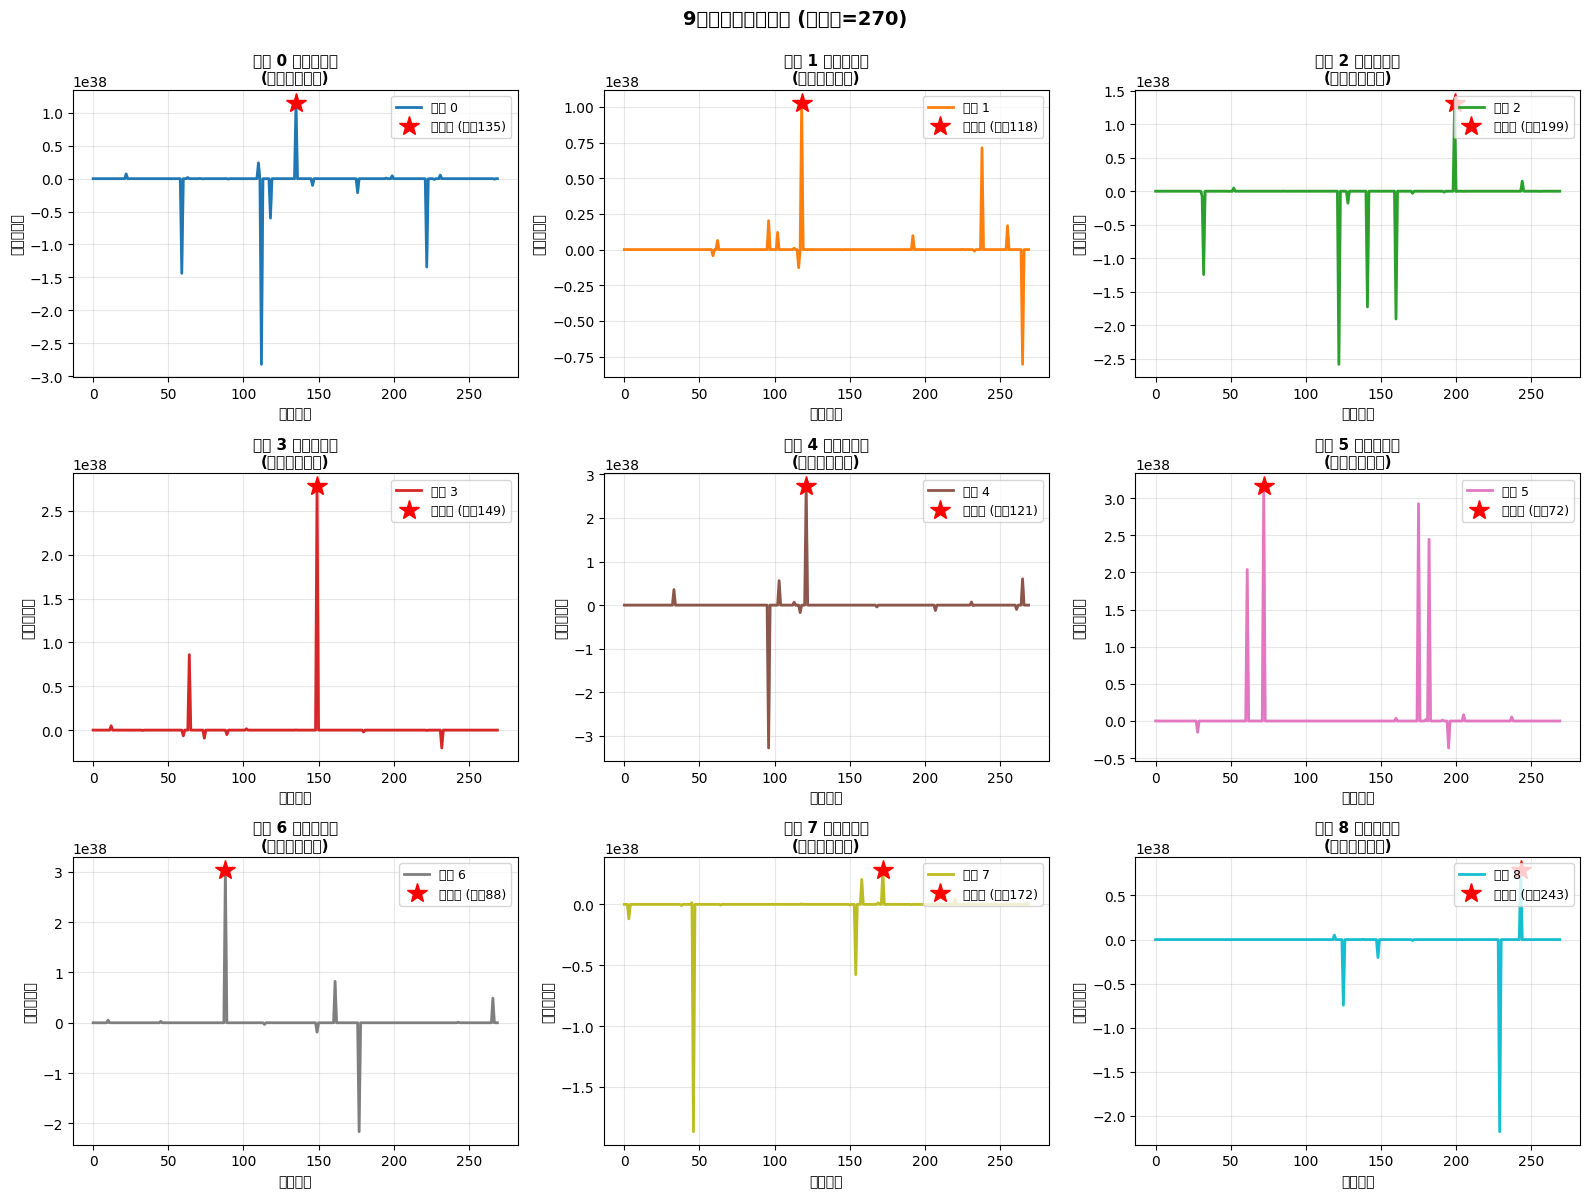


✓ 光谱可视化完成


In [12]:
print("\n" + "=" * 70)
print("补丁光谱特征可视化")
print("=" * 70)

# 为每个类别显示补丁中心像素的光谱曲线
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes_flat = axes.flatten()

class_colors = plt.cm.tab10(np.linspace(0, 1, 9))

for idx, (class_id, patch) in enumerate(sorted(samples_per_class.items())):
    ax = axes_flat[idx]
    
    # 提取补丁中心像素的光谱
    center_r, center_c = margin, margin
    spectrum = patch[center_r, center_c, :]
    
    # 绘制光谱曲线
    wavelengths = np.arange(C)
    ax.plot(wavelengths, spectrum, color=class_colors[class_id], 
            linewidth=2, label=f'类别 {class_id}')
    ax.fill_between(wavelengths, spectrum, alpha=0.3, color=class_colors[class_id])
    
    # 标记最大值
    max_idx = np.argmax(spectrum)
    ax.plot(max_idx, spectrum[max_idx], 'r*', markersize=15, 
            label=f'最大值 (波段{max_idx})')
    
    # 样式设置
    ax.set_title(f'类别 {class_id} 的光谱特征\n(补丁中心像素)', 
                 fontsize=11, fontweight='bold')
    ax.set_xlabel('波段索引')
    ax.set_ylabel('反射率强度')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper right', fontsize=9)
    
    # 统计信息
    print(f"类别 {class_id}: 光谱范围=[{spectrum.min():.2f}, {spectrum.max():.2f}], "
          f"平均值={spectrum.mean():.2f}, 峰值波段={max_idx}")

# 隐藏未使用的子图
for idx in range(len(samples_per_class), len(axes_flat)):
    axes_flat[idx].axis('off')

plt.suptitle(f'9个类别的光谱曲线 (波段数={C})', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print(f"\n✓ 光谱可视化完成")


综合样本展示面板


/tmp/ipykernel_2520831/3701331450.py:22: RuntimeWarning: overflow encountered in subtract
  patch_normalized = (patch - patch.min()) / (patch.max() - patch.min() + 1e-8)
/tmp/ipykernel_2520831/3701331450.py:22: RuntimeWarning: overflow encountered in scalar subtract
  patch_normalized = (patch - patch.min()) / (patch.max() - patch.min() + 1e-8)
/tmp/ipykernel_2520831/3701331450.py:22: RuntimeWarning: invalid value encountered in divide
  patch_normalized = (patch - patch.min()) / (patch.max() - patch.min() + 1e-8)
/home/chenhaoran/BASE/anaconda3/envs/LoLA/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/chenhaoran/BASE/anaconda3/envs/LoLA/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/ch

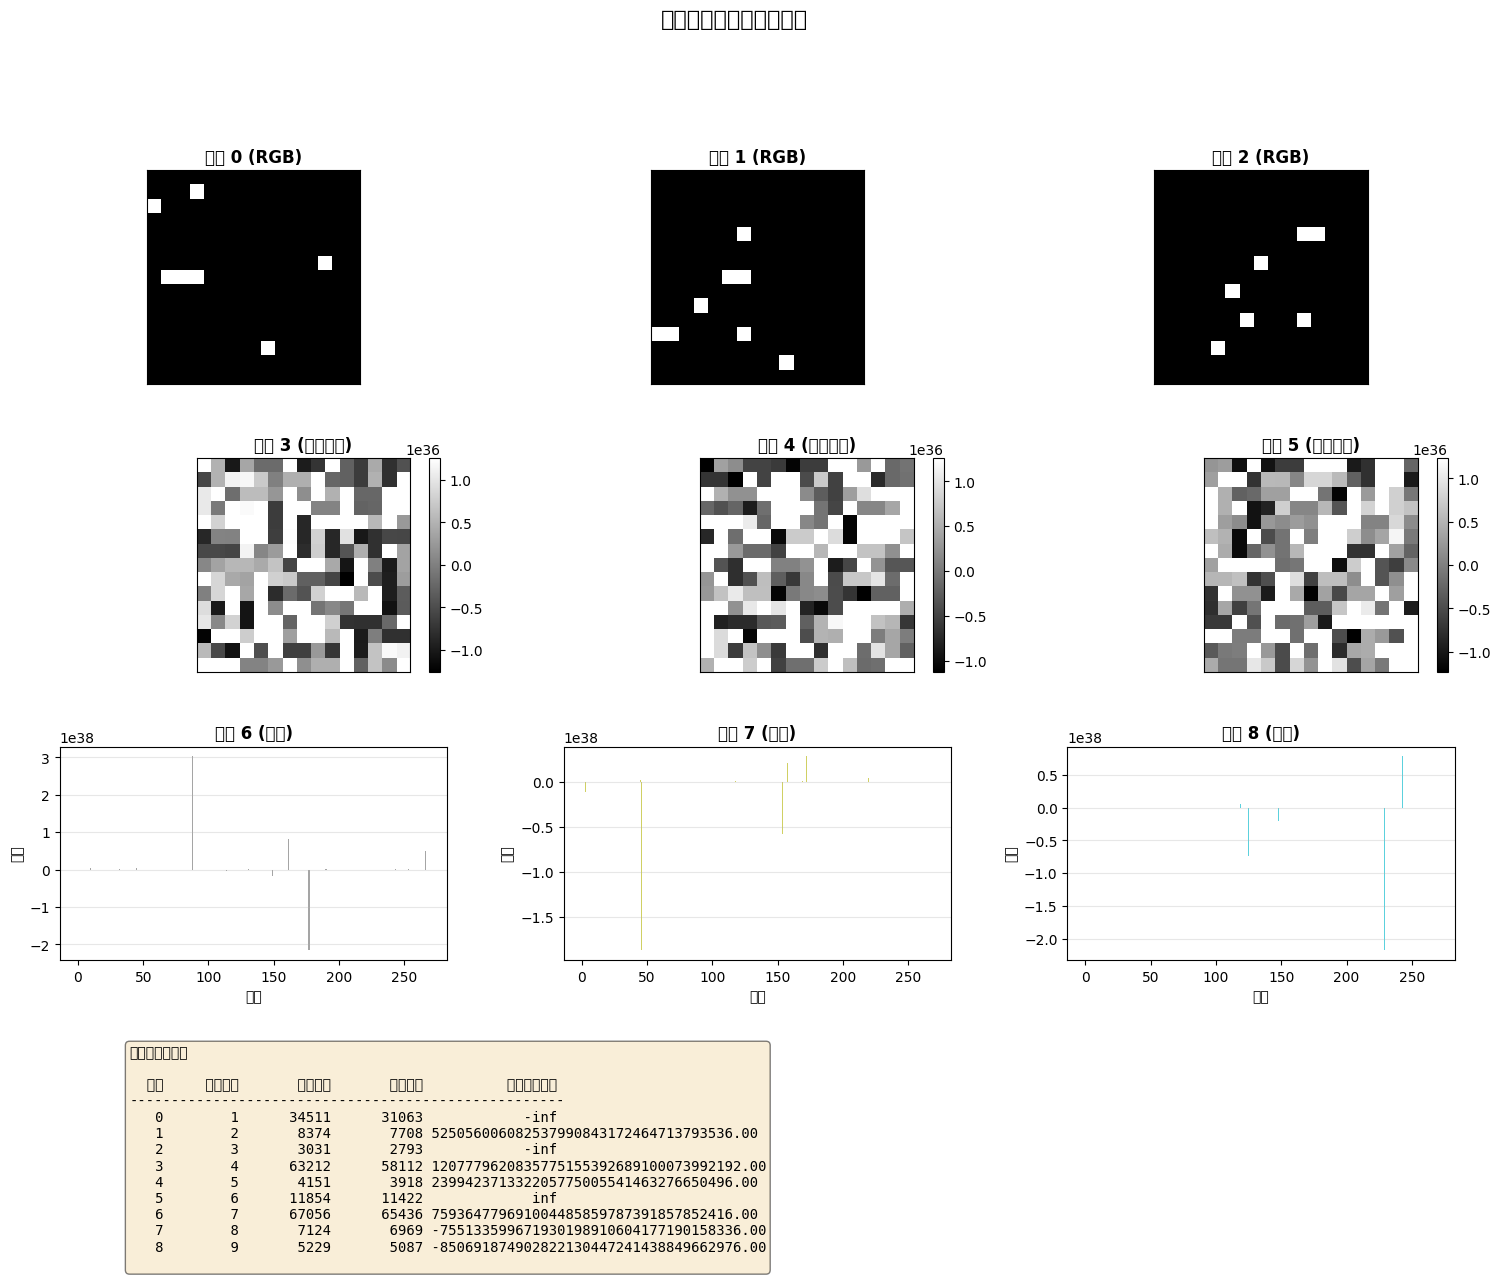


✓ 综合展示面板完成


In [13]:
print("\n" + "=" * 70)
print("综合样本展示面板")
print("=" * 70)

# 创建一个大的综合展示面板
fig = plt.figure(figsize=(18, 14))
gs = fig.add_gridspec(4, 3, hspace=0.35, wspace=0.3)

class_ids = sorted(list(samples_per_class.keys()))

for idx, class_id in enumerate(class_ids):
    class_ids_list = list(samples_per_class.keys())
    row = idx // 3
    col = idx % 3
    
    patch = samples_per_class[class_id]
    
    # 第一行：RGB图像
    if idx < 3:
        ax_rgb = fig.add_subplot(gs[0, col])
        
        patch_normalized = (patch - patch.min()) / (patch.max() - patch.min() + 1e-8)
        rgb_patch = np.stack([
            patch_normalized[:, :, red_band],
            patch_normalized[:, :, green_band],
            patch_normalized[:, :, blue_band]
        ], axis=-1)
        rgb_patch = np.clip(rgb_patch, 0, 1)
        
        ax_rgb.imshow(rgb_patch)
        ax_rgb.set_title(f'类别 {class_id} (RGB)', fontweight='bold')
        ax_rgb.set_xticks([])
        ax_rgb.set_yticks([])
    
    # 第二行：灰度强度
    if 3 <= idx < 6:
        ax_gray = fig.add_subplot(gs[1, col])
        
        # 使用平均强度
        mean_intensity = patch.mean(axis=-1)
        im = ax_gray.imshow(mean_intensity, cmap='gray')
        ax_gray.set_title(f'类别 {class_id} (平均强度)', fontweight='bold')
        ax_gray.set_xticks([])
        ax_gray.set_yticks([])
        plt.colorbar(im, ax=ax_gray, fraction=0.046)
    
    # 第三行：光谱直方图
    if 6 <= idx < 9:
        ax_spec = fig.add_subplot(gs[2, col])
        
        spectrum = patch[margin, margin, :]
        ax_spec.bar(range(C), spectrum, color=class_colors[class_id], alpha=0.7)
        ax_spec.set_title(f'类别 {class_id} (光谱)', fontweight='bold')
        ax_spec.set_xlabel('波段')
        ax_spec.set_ylabel('强度')
        ax_spec.grid(axis='y', alpha=0.3)

# 第四行：统计信息表
ax_stats = fig.add_subplot(gs[3, :])
ax_stats.axis('off')

# 创建统计表
stats_text = "类别统计信息表\n\n"
stats_text += f"{'类别':>4} {'原始标签':>8} {'该类像素':>10} {'可用位置':>10} {'补丁中心强度':>15}\n"
stats_text += "-" * 52 + "\n"

for class_id in class_ids:
    original_label = class_id + 1
    metadata = samples_metadata[class_id]
    patch = samples_per_class[class_id]
    center_intensity = patch[margin, margin, :].mean()
    
    stats_text += (f"{class_id:4d} {original_label:8d} "
                   f"{metadata['count']:10d} {metadata['valid_count']:10d} "
                   f"{center_intensity:15.2f}\n")

ax_stats.text(0.05, 0.95, stats_text, transform=ax_stats.transAxes,
              fontsize=10, verticalalignment='top', family='monospace',
              bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('超光谱样本综合展示面板', fontsize=16, fontweight='bold', y=0.995)
plt.show()

print(f"\n✓ 综合展示面板完成")